# Research on patterns in the use of taxis in Chicago.

The assignment is to explore a taxi ride market to the launching a ride-sharing company.

Some information about the competitors is available, as well as about the weather when the trips were made.

The purpose of the study: to analyze data from competitors in the available information, to understand passenger preferences and the impact of external factors on rides. 

The work plan: 

<a href='#section1'>1. Exploratory data analysis of the number of trips by competitors and destinations</a>

<a href='#section2'>2. Testing hypothesis about the impact of weather on trip duration</a>

<a href='#section3'>3. Overall Conclusion</a>

In [1]:
#importing of libraries
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from scipy import stats as st

#some global constats for formatting the output string
BOLD = '\033[1m'
END = '\033[0m'

## 1. Exploratory data analysis of the number of trips by competitors and destinations
<a id='section1'></a>

In [2]:
#reading files that contains the data about competitors 
data1 = pd.read_csv('/datasets/project_sql_result_01.csv')
data2 = pd.read_csv('/datasets/project_sql_result_04.csv')

#looking at the data's general information. 
print(BOLD + 'General information' + END)
for df, description in zip([data1, data2], ['company names', 'drop-off locations']):
    print(BOLD + 'The table with statistics for ' + description + ':' + END)
    print(df.info())
    print()
    
#looking at the first few rows in a table    
for df, description in zip([data1, data2], ['company names', 'drop-off locations']):
    print(BOLD + 'The first rows in the table with statistics for ' + description + ':' + END)
    display(df.head())
    print()

General information
The table with statistics for company names:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
company_name    64 non-null object
trips_amount    64 non-null int64
dtypes: int64(1), object(1)
memory usage: 1.1+ KB
None

The table with statistics for drop-off locations:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
dropoff_location_name    94 non-null object
average_trips            94 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB
None

The first rows in the table with statistics for company names:


,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasing,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299



The first rows in the table with statistics for drop-off locations:


,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000


*The first table contains the information about __the number of trips for 64 competitors for 2 days__: on November 15-16, 2017.*

*The second table contains the information about __the average number of trips for 94 drop-off locations for these companies in November 2017__.*

*There are no missing values in these tables. The data types in their columns are appropriate.*

Numerical features
The 'trips_amount' column in the table for company names:


,count,mean,std,min,25%,50%,75%,max
trips_amount,64.0,2145.5,3812.3,2.0,20.8,178.5,2106.5,19558.0



The 'average_trips' column in the table for drop-off locations:


,count,mean,std,min,25%,50%,75%,max
average_trips,94.0,600.0,1714.6,1.8,14.3,52.0,298.9,10727.5



Histograms for numerical features


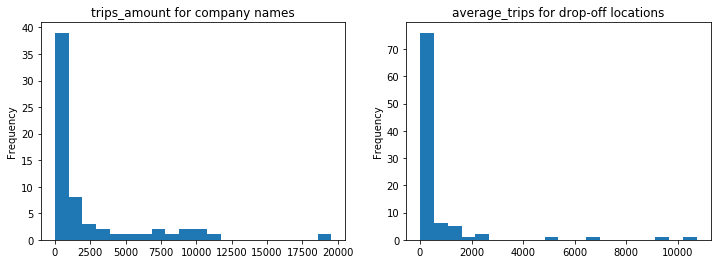

In [3]:
#Let's look at the features that take numerical values
#creating the corresponding lists of tables and columns
num_tables = [data1, data2]
num_cols = ['trips_amount', 'average_trips']
num_table_description = ['company names', 'drop-off locations']

print(BOLD + 'Numerical features' + END)
#looking at the features that take numerical values 
for table, col, description in zip(num_tables, num_cols, num_table_description):
    print(BOLD + "The '" + col + "' column in the table for " + description + ':' + END)
    display(round(table[[col]].describe(), 1).T)
    print()
   
#function to plot several histograms in one line
def hist_in_row(tables, cols, bins_num=None):
    cols_num = len(cols)
    fig, axes = plt.subplots(ncols=cols_num, figsize=(6*cols_num, 4))
    for i, (table, col) in enumerate(zip(tables, cols)):
        axes[i%cols_num].hist(x=col, data=table, bins=bins_num)
        axes[i%cols_num].set_title(col + ' for ' + num_table_description[i])
        axes[i%cols_num].set_ylabel('Frequency')

print(BOLD + 'Histograms for numerical features' + END)
hist_in_row(num_tables, num_cols, 20)

*Taxi companies make from 2 to more than 19.5 thousand trips in two days. __The market is not equally distributed among companies__. More than half of them make few number of trips (see the left histogram). Only one company makes almost 20 thousand trips. This large company is pulling the mean up away from the median.*

*Some Chicago neighborhoods have only two cars a day, while others have up to 10,000 trips a day. __A small number of destinations are very popular__ and there are thousands of trips per day in these directions (right tail of the right histogram). These drop-off locations are also pulling the mean up away from the median.*

The number of rides by taxi companies:


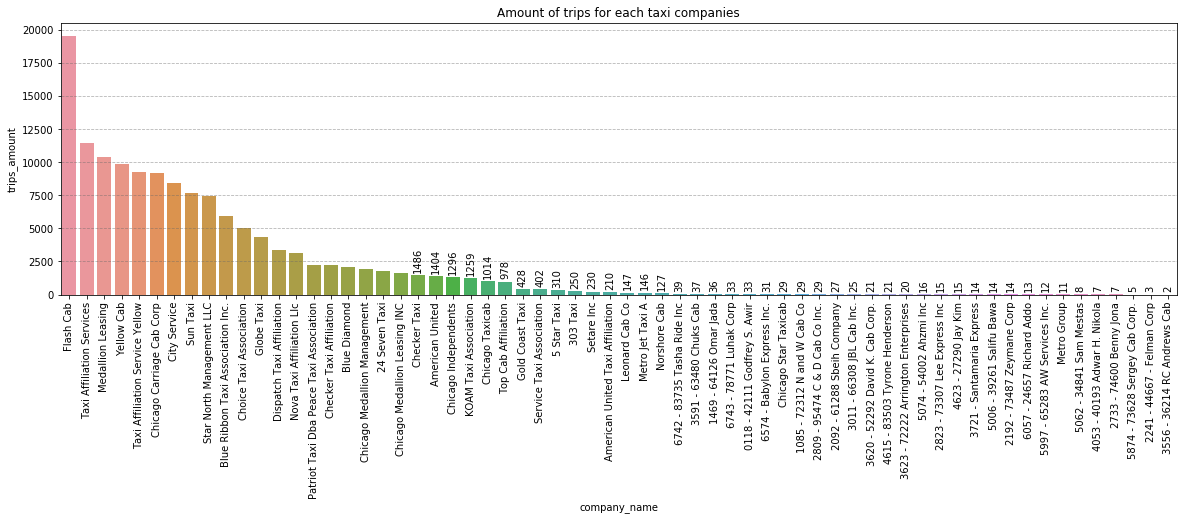

The share of rides by taxi companies:


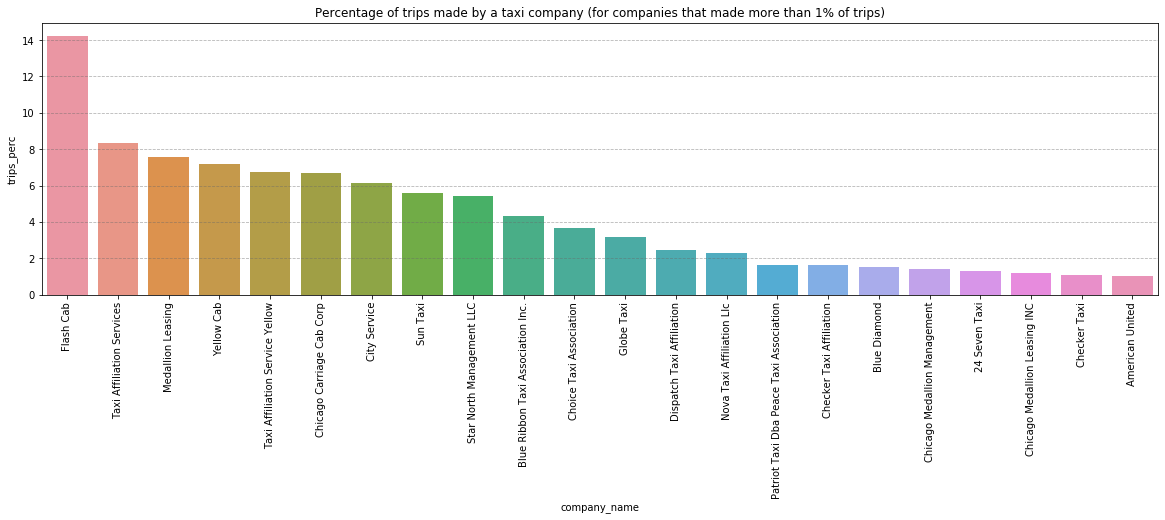

In [4]:
#Let's look at number of trips for each taxi companies in more details
#function to plot barplots by company names
def barplot_by_companies(data, feature, title, show_small_values_less=None):
    fig, ax = plt.subplots(figsize=(20, 5))
    sns.barplot(x='company_name', y=feature, ax=ax, data=data);
    ax.xaxis.set_tick_params(rotation=90)
    ax.grid(axis='y', linestyle='--', color='dimgray', alpha=0.5)
    ax.set_title(title)

    #adding labels for not significant numbers of trips 
    if show_small_values_less is not None:
        rects = ax.patches
        labels = [str(v) for v in data[feature] if v<=show_small_values_less]
        for rect, label in zip(rects[-len(labels):], labels):
            height = rect.get_height()
            ax.text(rect.get_x() + rect.get_width() / 2, height + 200, label,
                    ha='center', va='bottom', rotation=90)
    plt.show()

print(BOLD + 'The number of rides by taxi companies:' + END)
barplot_by_companies(data1, 'trips_amount', 'Amount of trips for each taxi companies', 1500)
print(BOLD + 'The share of rides by taxi companies:' + END)
barplot_by_companies(data1.assign(trips_perc=100*data1.trips_amount/(data1.trips_amount.sum()))\
                        .query('trips_perc>1'),
                     'trips_perc',
                     'Percentage of trips made by a taxi company (for companies that made more than 1% of trips)')

*Flash Cabs made almost 20,000 trips on November 15-16, 2017, which is 14% of the total market and almost 2 more than its next competitor Taxi Affiliation Services. A dozen companies own almost the entire market, there is a lot of companies that have made a small number of trips these days.*

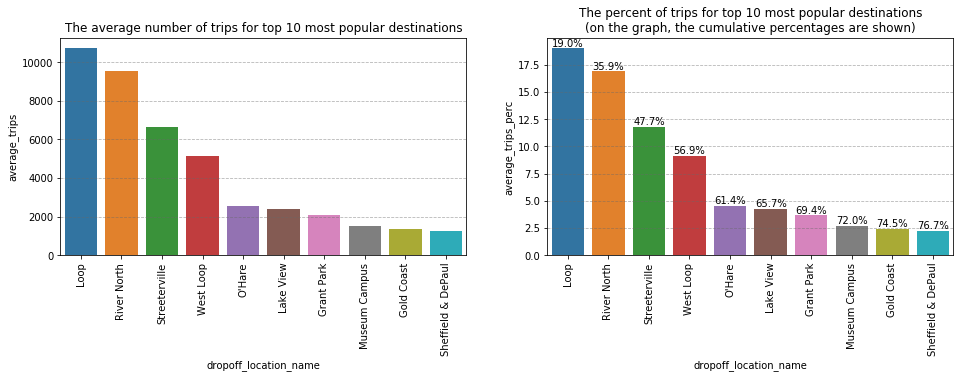

In [5]:
#Let's look at 10 most popular neighborhoods in terms of drop-offs
fig, axes = plt.subplots(ncols=2, figsize=(8*2, 4))
sns.barplot(x='dropoff_location_name', y='average_trips', ax=axes[0],\
            data=data2.sort_values('average_trips', ascending=False).head(10));
axes[0].set_title('The average number of trips for top 10 most popular destinations')

perc_data = data2.assign(average_trips_perc=100*data2.average_trips/(data2.average_trips.sum()))\
                   .sort_values('average_trips_perc', ascending=False).head(10)
sns.barplot(x='dropoff_location_name', y='average_trips_perc', ax=axes[1], data=perc_data);
axes[1].set_title('The percent of trips for top 10 most popular destinations\n'
                      + '(on the graph, the cumulative percentages are shown)')
rects = axes[1].patches
labels = map(str, round(np.cumsum(perc_data.average_trips_perc),1))
for rect, label in zip(rects, labels):
    height = rect.get_height()
    axes[1].text(rect.get_x() + rect.get_width() / 2, height, label+'%',
            ha='center', va='bottom')

for i in range(2):
    axes[i].xaxis.set_tick_params(rotation=90)
    axes[i].grid(axis='y', linestyle='--', color='dimgray', alpha=0.5)

*Most of the trips were made in 4 directions: Loop, River North, Streeterville and West Loop. Top 10 popular destinations out of 94 make up the majority of trips.*

### Conclusions

There are 64 taxi companies, but trips is not equally distributed among these companies. This can be seen by the amount of rides for 2 days for them. There are a lot of companies that make several trips and a dozen companies make thousands of trips a day, among which the Flash Cabs company stands out, which makes almost 10 thousand trips a day, this is almost 15% of the total market.

The distribution of trips across the Chicago neighborhoods is also not equal. In some directions several cars arrive a day, in other areas thousands of cars arrive during the day. A small number of destinations are particularly popular, among which the Loop, River North, Streeterville and West Loop stand out. O'Hare International Airport and several sight-seeing places are a little behind them.

## 2. Testing hypothesis about the impact of weather on trip duration
<a id='section2'></a>

In [6]:
#reading file that contains the data
data = pd.read_csv('/datasets/project_sql_result_07.csv')

#looking at the data's general information. 
print(BOLD + 'General information:' + END)
print(data.info())
print()

#looking at the first few rows in a table
print(BOLD + 'The first few rows in a dataset:' + END)
display(data.head())

General information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
start_ts              1068 non-null object
weather_conditions    1068 non-null object
duration_seconds      1068 non-null float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB
None

The first few rows in a dataset:


,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0


*The table contains __1068 rows__ about __hourly weather conditions and durations of trips__ from the Loop to O'Hare International Airport on Saturdays in November 2017.*

*There are no null values in the dataset. The `'start_ts'` column is object type but contains date and time. We could change the type to the appropriate one, but this is not necessary in order to test the hypothesis about the impact of weather conditions on the duration of the trip.*

Descriptive statistics for trip durations:


,min,positive_min,max,mean,median,percentil25,percentil75,std
duration_seconds,0.0,60.0,7440.0,2071.7,1980.0,1438.2,2580.0,769.5


The number of zero values: 6

Histogram for trip durations:


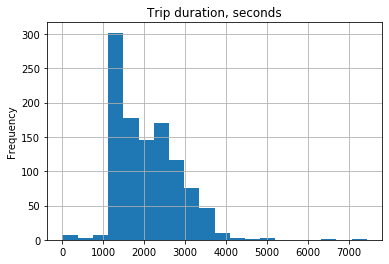

Number and share of observations with good and bad weather conditions:


,count,percent
Good,888,83.0
Bad,180,17.0


In [7]:
#Let's look at some describtive statistics of the features
#function to find the minimum positive number in a series
def positive_min(series):
    return min([x for x in series.dropna() if x > 0])

#function to find 25%-percentile of a series 
def percentil25(series): 
    return series.quantile(0.25)

#function to find 75%-percentile of a series 
def percentil75(series): 
    return series.quantile(0.75)

print(BOLD + 'Descriptive statistics for trip durations:' + END)
display(round(data[['duration_seconds']]\
                  .agg(['min', positive_min, 'max', 'mean', 'median', percentil25, percentil75, 'std']), 1).T)

#Let's look at the number of zero values that can be considered as missing values.
print('The number of zero values:', len(data[data['duration_seconds']==0]))   
print()

print(BOLD + 'Histogram for trip durations:' + END)
ax = data.duration_seconds.hist(bins=20);
ax.set_title('Trip duration, seconds')
ax.set_ylabel('Frequency')

plt.show()

print(BOLD + 'Number and share of observations with good and bad weather conditions:' + END)
display(pd.DataFrame({'count': data.weather_conditions.value_counts(),
              'percent': round(100*data.weather_conditions.value_counts()/len(data))}))

*The duration of the trip is from 1 minute to two hours. Almost a third of the trips are relatively short: not longer than 15-20 minutes. On average, the trip lasts half an hour.*

*6 trips with zero duration look like wrong data. It might be worth excluding these values from consideration.*

*In November 2017, most of the time on Saturdays was not rainy: more than 80% of observations with good weather conditions, but almost 20% of observations were still with rain.*

In [8]:
#Let's exclude trips with zero duration from consideration
data=data[data.duration_seconds!=0]

*We have removed zero duration rides from the dataset as doubtful data.*

Desciptive statistics for trip durations for Good and Bad weather:
Bad


,count,min,max,mean,median,std,var
duration_minutes,180.0,8.0,83.0,40.5,42.3,12.0,144.5


Good


,count,min,max,mean,median,std,var
duration_minutes,882.0,1.0,124.0,33.6,30.0,12.4,153.6



Distribution of trip durations for Good and Bad weather:


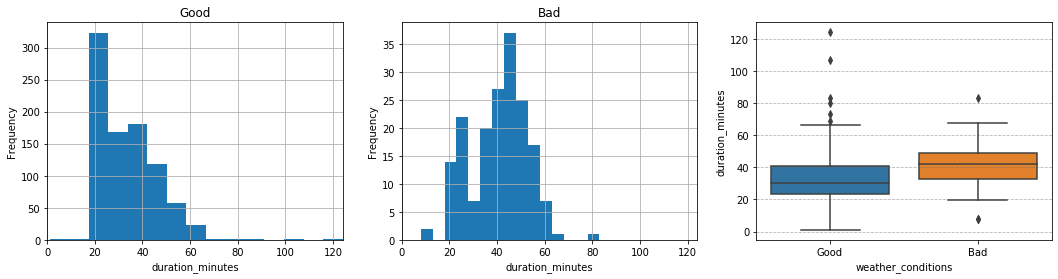

In [9]:
#Let's look at descriptive statictics and distribution of trip durations for Good and Bad weather conditions 
#function to print the descriptive statistics and distribution of trip durations for different weather conditions 
def descrip_stat_and_distr(data, feature):
    #printing the descriptive statistics for trip durations for Good and Bad weather
    print(BOLD + 'Desciptive statistics for trip durations for Good and Bad weather:' + END)
    for name, group_data in data.groupby('weather_conditions'):
        print(BOLD + name + END)
        display(group_data[[feature]].agg(['count', 'min', 'max', 'mean', 'median', 'std', 'var']).round(1).T)
    print()

    #ploting histograms and boxplots for durations for diffrent weather conditions
    print(BOLD + 'Distribution of trip durations for Good and Bad weather:' + END)
    cols_num = len(data.weather_conditions.unique()) + 1
    fig, axes = plt.subplots(ncols=cols_num, figsize=(6*cols_num, 4))
    for i, value in enumerate(data.weather_conditions.unique()):
        data[data['weather_conditions']==value][feature].hist(ax=axes[i], bins=15)
        axes[i].set_title(value)
        axes[i].set_xlabel(feature)
        axes[i].set_ylabel('Frequency')
        axes[i].set_xlim((0, data.duration_seconds.max()/60))
    sns.boxplot(x='weather_conditions', y=feature, data=data, ax=axes[cols_num-1]);    
    axes[cols_num-1].grid(axis='y', linestyle='--', color='dimgray', alpha=0.5)

#Let's convert the trip durations from seconds to minutes for more convenient work with this feature
#and look at its descriptive statistics and distribution for different weather conditions
descrip_stat_and_distr(data.assign(duration_minutes=data.duration_seconds/60), 'duration_minutes')

*__The average of trip durations for good and bad weather__ conditions __are shifted relative to each other__: rainy trips take longer.*

*The distributions of the __duration random variable__ for different weather conditions does __not__ have the form of a __normal distribution__.*

Q-Q Plots for duration of a trip for Good weather and Bad weather:


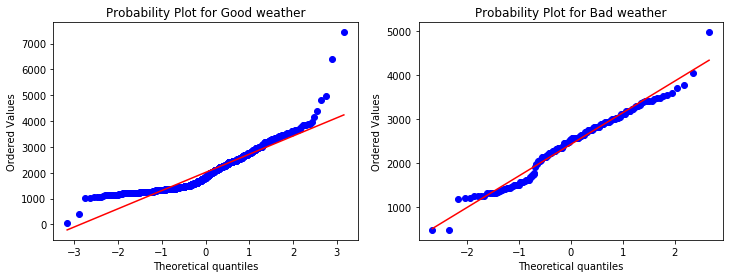

Shapiro-Wilk normality tests:
Hypotheses:
H₀:Trip Duration for Good weather is distributed normally
H₁:Trip Duration for Good weather is not distributed normally
Shapiro-Wilk normality test, p-value:  4.658177891397572e-24
We reject the hypothesis H₀

Hypotheses:
H₀:Trip Duration for Bad weather is distributed normally
H₁:Trip Duration for Bad weather is not distributed normally
Shapiro-Wilk normality test, p-value:  0.0036118649877607822
We reject the hypothesis H₀



In [10]:
#Let's formally test the hypothesis that the distributios of samples are normal
def norm_test(samples, sample_descriptions, random_value_description):
    print(BOLD + 'Q-Q Plots for duration of a trip for ' + ' and '.join(sample_descriptions) + ':' + END)
    fig, axes = plt.subplots(ncols=2, figsize=(6*2, 4))
    for i, (sample, descr) in enumerate(zip(samples, sample_descriptions)):
        st.probplot(sample.duration_seconds, dist="norm", plot=axes[i])
        axes[i].set_title('Probability Plot for ' + descr)
    plt.show()

    #Let's test the hypothesis that the distribution of sample is normal using the Shapiro-Wilk normality test
    print(BOLD + 'Shapiro-Wilk normality tests:' + END)
    alpha = 0.05
    for sample, descr in zip(samples, sample_descriptions):
        print('Hypotheses:')
        print(BOLD + 'H\u2080:' + random_value_description + ' for ' + descr + ' is distributed normally' + END)
        print(BOLD + 'H\u2081:' + random_value_description + ' for ' + descr + ' is not distributed normally' + END)
        norn_pvalue = st.shapiro(sample.duration_seconds)[1]
        print("Shapiro-Wilk normality test, p-value: ", norn_pvalue)
        if (norn_pvalue < alpha): 
            print("We reject the hypothesis H\u2080") 
        else: 
            print("We can't reject the hypothesis H\u2080") 
        print()

#testing the hypotheses of normality of trip durations for good and bad weather
norm_test([data[data.weather_conditions=='Good'], data[data.weather_conditions=='Bad']],
          ['Good weather', 'Bad weather'], 'Trip Duration')

*__The distributions of trip duration for different weather conditions are most likely different from the normal one__, since the points on the Q-Q graphs do not lie on a straight line, but are described by a non-linear curve and some of the points lie far from the straight lines.*

*Shapiro-Wilk normality tests also reject the hypothesis  𝐻0  that the distribution of sample is normal.*

*Thus, we __can not use a parametric Student's t-test__ in order to compare the average ride durations for good and bad weather conditions.*

In [11]:
#function to run Mann-Whitney U test for two samples
def mann_whitneyu_test(sample1, sample2, description):
    print(BOLD + 'Mann-Whitney U test:' + END)
    alpha = 0.05
    print('Hypotheses:')
    print(BOLD + 'H\u2080: Sample distributions of ' + description + ' are equal.'+ END)
    print(BOLD +'H\u2081: Sample distributions of ' + description + ' are not equal.' + END)
    pvalue = st.mannwhitneyu(sample1, sample2, alternative='two-sided')[1]
    print("Mann-Whitney U test, p-value: ", pvalue)
    if (pvalue < alpha): 
        print("We reject the hypothesis H\u2080") 
    else: 
        print("We can't reject the hypothesis H\u2080") 

#running Mann-Whitney U test for trip durations for good and bad weather
mann_whitneyu_test(data[data.weather_conditions=='Good'].duration_seconds,
                   data[data.weather_conditions=='Bad'].duration_seconds,
                   'trip duration for good and bad weather')

Mann-Whitney U test:
Hypotheses:
H₀: Sample distributions of trip duration for good and bad weather are equal.
H₁: Sample distributions of trip duration for good and bad weather are not equal.
Mann-Whitney U test, p-value:  1.404198063536793e-13
We reject the hypothesis H₀


*__The Mann-Whitney U test rejects the null hypothesis about equality of trip duration distributions for good and bad weather conditions__.  Thus, there is likely some difference between the samples. The __average of trip duration for good weather conditions is about 30 minutes__. The __average of trip duration for rainy weather is about 40 minutes__. Rainy rides from the Loop to O'Hare International Airport are longer more than 10 minutes on average.*

### Conclusions

The data about a little over 1,000 trips from the Loop to O'Hare International Airport with known weather conditions was used to investigate the impact of rain on the duration of the trip. The duration of the trip was from 1 minute to two hours. On average, the trip lasted half an hour.

The null hypothesis that the average duration of Saturday rides from the Loop to O'Hare International Airport in the rain and without rain are equal against the two-sided alternative __is rejected__ at the 5% significance level using a nonparametric rank Mann-Whitney U test. We can not use the Student's t-test due to violation of the assumption of normality. __Rainy rides__ from the Loop to O'Hare International Airport take __longer more than 10 minutes on average__.

## 3. Overall Conclusion
<a id='section3'></a>

There are some data on operating Chicago taxi companies and data on weather conditions for the days when these companies were working to further analyze them and to look for insights for launching a new ride-sharing company.

The dataset contains information about 
* the number of trips for 64 taxi companies for 2 days: on November 15-16, 2017 
* the average number of trips for 94 drop-off locations for these companies in November 2017
* the durations of 1,068 trips from the Loop to O'Hare International Airport Saturdays in November 2017 with known weather conditions

According to available data, the following patterns were identified:
* Among all taxi companies, the Flash Cabs company stands out, which makes almost 10 thousand trips a day, which is almost 15% of the total market. It is worth taking a closer look at this company: look at its regular routes and its marketing campaigns, why passengers choose it.
* A small number of destinations are particularly popular. The most popular are 4 directions: Loop, River North, Streeterville and West Loop. O'Hare International Airport and several sight-seeing places have about a tousand dropp-offs a day. The ride-sharing company should build their routes precisely in these directions. It might also be worth paying attention to the time of trips and also where these trips started from.
* The average duration of Saturday rides from the Loop to O'Hare International Airport is increased by an average of 10 minutes in case of rain. It is worth taking into account the weather conditions when laying the route, at least along this route on Saturday.